<h2>Описание проекта <a class="tocSkip"> </h2>

**Заказчик** — Яндекс Недвижимость
    
**Цель проекта** - выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

    
**Входные данные Яндекс Недвижимости** — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах. Ниже описаны значения столбцов:
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

<a id="introduction"></a>

**План работ:**

- [Откроем файл с данными и изучим общую информацию](#start)
- [Подготовка данных](#preprocessing)
- [Исследовательский анализ данных](#analyzing)
- [Вывод](#end)


## Откроем файл с данными и изучим общую информацию. 
<a id="start"></a>

In [333]:
#Импортируем библиотеку pandas
import pandas as pd
#Чтобы не выдавало ошибку, когда меняем пропуски в locality_name на "Без названия"###
pd.options.mode.chained_assignment = None
#Импортируем модуль библиотеки matplotlib  pyplot
import matplotlib.pyplot as plt
#Импортируем  библиотеку warnings и numpy для предотвращения возникновения всплывабщих ошибок
import warnings
#Код для предотвращения всплывающих ошибок
warnings.filterwarnings("ignore")

In [334]:
#Считываем данные с csv - файла в датафрейм и сохраняем в переменной raw_data
raw_data = pd.read_csv('real_estate_data.csv', sep='\t')

In [335]:
#Создадим дубликат, датафрейма, с которым мы будем работать и позже сравним получившиеся результаты с сырыми данными
data = raw_data
#Выводим общую информацию о датафрейме
print(raw_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**В данных присутсвуют пропуски, которые, в последующем, будут обработаны.**

In [336]:
#Выводим первые 5 строчек датафрейма
raw_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

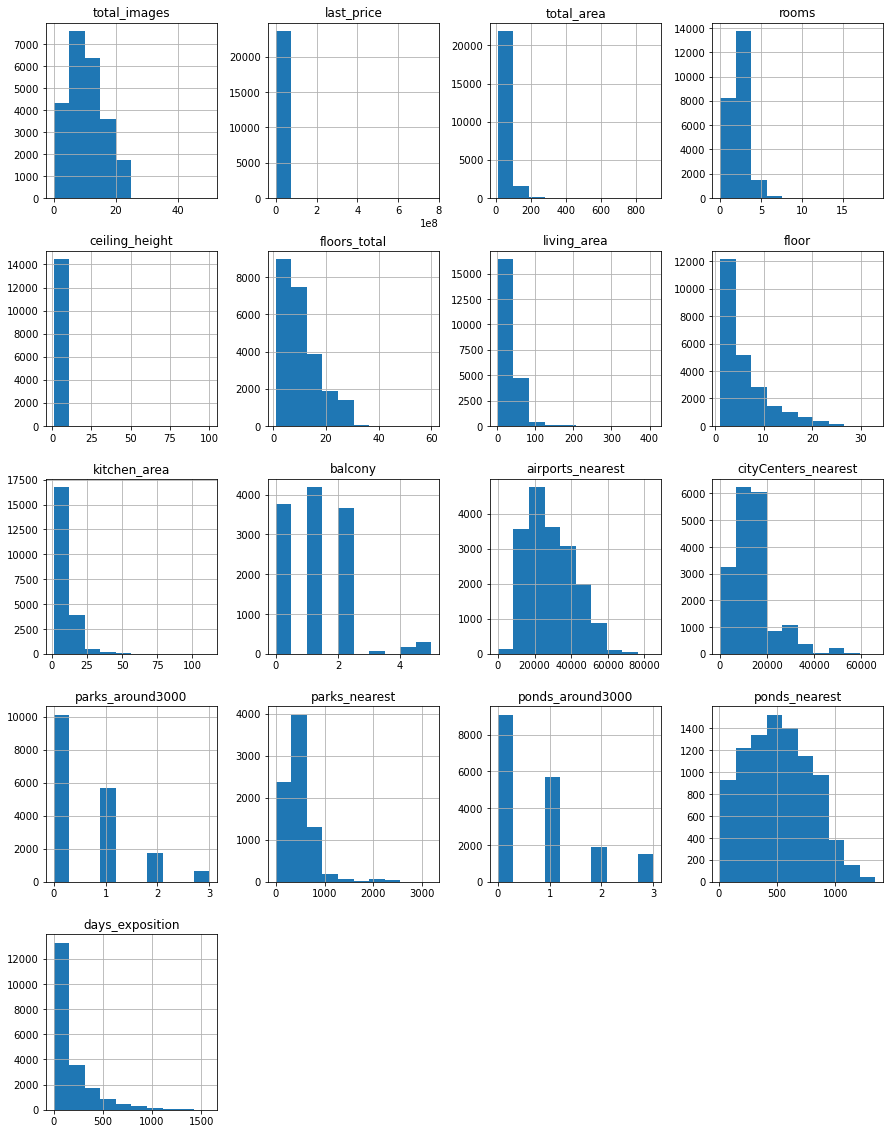

In [337]:
#Выводим гистограммы по всем количественным показателям
raw_data.hist(figsize=(15, 20))

Следующие столбцы имеют количественные значения (17):
   - количество фотографий
   - цена квартиры - есть аномально большие значения, судя по графику
   - общая площадь - есть аномально большие значения, судя по графику
   - количество комнат - есть аномально большие значения, судя по графику
   - высота потолков - есть аномально большие значения, судя по графику
   - всего этажей в доме - есть аномально большие значения, судя по графику
   - жилая площадь - есть аномально большие значения, судя по графику
   - этаж квартиры
   - площадь кухни - есть аномально большие значения, судя по графику
   - количество балконов
   - расстояние до ближайшего аэропорта
   - расстояние до центра Санкт - Петербурга
   - количество парков в радиусе 3км
   - расстояние до ближайшего парка
   - количество водоемов в радиусе 3км
   - расстояние до ближайшего водоема
   - дни продажи
    
Вероятнее всего, что такие выбросы не являются какой - то случайностью и технической ошибкой, а такие квартиры действительно существуют, но все же мы будем считать их аномалиями и в дальнейшем уберем такие объявления из анализа для более точных средних результатов.
    
    
    

[Описание проекта](#introduction)

## Предобработка данных

<a id="preprocessing"></a>

#### Работа c пропусками

In [338]:
#Для начала проверим, имеются ли дубликаты в датафрейме
data.duplicated().sum()

0

In [339]:
#Выведем все пропуски в данных
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

- в столбце `balcony` (количество балконов), предположительно пропуски означают отсутствие балконов, следует заменить пропуски на нули
- в столбце `is_apartment` присутсвуют только значения False, следовательно пропуски означают то, что помещение жилое, следует заменить пропуски на значение "True"

In [340]:
data['balcony'] = data['balcony'].fillna(0)
data['is_apartment'] = data['is_apartment'].fillna(True)

In [341]:
#Выведем общую информацию о пропусках, чтобы понять, отработал ли скрипт
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [342]:
#Выясним, пересекается ли количество пропусков в картографических данных
data[(data['cityCenters_nearest'].isna() == True) &
              (data['airports_nearest'].isna() == True) &
     (data['parks_around3000'].isna() == True)]['locality_name'].count()

5510

Да, действительно, в датасете 5510 строк, у которых пересекаются пропуски в трех колонках.

В столбцах `airports_nearest`, `cityCenters_nearest`, `parks_nearest`, `ponds_nearest`,`parks_around3000`, `ponds_around3000`, пропуски связаны с картографической системой, по какому - то принципу она не заполняет все значения, можно предположить, что у системы есть максимально возможное расстояние от центра, дальше которого она не заполняет картографические параметры

In [343]:
#Выявим максимульную дальность, которая была зарегистрированна при продаже квартиры
data[data['cityCenters_nearest'] == data['cityCenters_nearest'].max()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
9640,8,4200000.0,51.4,2014-12-10T00:00:00,2,2.55,5.0,31.0,2,True,...,6.0,1.0,посёлок Молодёжное,84869.0,65968.0,0.0,NaN,0.0,NaN,1194.0


65968.0м или же ~66	км от центра Санкт-Петербурга, для всех тех квартир, которые находятся дальше этого значения, проставляются пропуски во всех 6-ти показателях. В дальнейшем можно определиить такие квартиры в отдельную группу. Пропуски в этих 6-ти столбцах следует оставить, иначе новые значения исказят общую статистику.

На мой взгляд пропуски в высоте потолков можно заполнить и для это использовать медианные (потому что могут быть аномальные выбросы, которые исказят значение средней) значения высоты потолков по домам с одинаковой этажностью. Зачастую в России застройка является типовой.

In [344]:
# Пишем цикл для заполнения пропущенных значений
for floors in data['floors_total'].unique():
    data.loc[(data['ceiling_height'].isna() == True) & (data['floors_total'] == floors), 'ceiling_height'] = \
    data.loc[data['floors_total'] == floors, 'ceiling_height'].median()

In [345]:
#Проверим, остались ли строки без размера потолков
data[data['ceiling_height'].isna() == True]['total_images'].count()

78

Получилось 78 строк, в этих строках также отсутсвует этажность самого дома. Строк не так много и пропущенны значения, интересные для анализа, следует их удалить.

In [346]:
#Удаляем 78 строк
data = data[data['ceiling_height'].isna() == False]

 - объяснить пропуски в столбце `days_exposition` проблематично, но удалять строки с пропущенным значением или же заменять значения на нули нету смысла, потому что по другим колонкам значения указаны и удаление строк, как и замена значения нулем, может привести к искажению статистики и последующих выводов.

- пропуски в `kitchen_area` и `living_area` могли возникнуть по причине особенности как самой квартиры (евродвушка, евротрешка), так и человеческого фактора. Заполним их медианными значениями, исходя из корреляции.


In [347]:
data.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.000000,0.104928,0.116410,0.099450,0.005702,0.010452,0.105500,0.033536,0.040906,-0.028102,-0.024596,0.105838,0.047347,-0.002634,-0.047831,0.021103,-0.006026,-0.011238,-0.004013,-0.026792
last_price,0.104928,1.000000,0.653619,0.363151,0.069176,-0.007029,0.566405,0.026676,0.000682,-0.025089,-0.008806,0.519917,0.008566,-0.026023,-0.206273,0.151538,-0.016554,0.160494,-0.085507,0.081008
total_area,0.116410,0.653619,1.000000,0.758254,0.087146,-0.075958,0.939762,-0.025216,-0.007769,-0.071979,-0.034940,0.609336,0.010079,-0.029935,-0.230985,0.165913,-0.021286,0.163196,-0.099464,0.150067
rooms,0.099450,0.363151,0.758254,1.000000,0.047607,-0.228398,0.845879,-0.151450,-0.005042,-0.145935,-0.087659,0.269726,-0.015879,-0.060681,-0.184764,0.138003,-0.053851,0.093216,-0.058979,0.127390
ceiling_height,0.005702,0.069176,0.087146,0.047607,1.000000,-0.015044,0.082295,-0.003774,-0.024901,0.001922,0.019322,0.081943,0.029708,-0.019641,-0.079756,0.058513,-0.020653,0.071781,-0.052241,0.019026
floors_total,0.010452,-0.007029,-0.075958,-0.228398,-0.015044,1.000000,-0.169491,0.677867,-0.003077,0.070180,0.050811,0.163717,0.172943,0.108470,0.019646,-0.252775,0.097527,-0.123230,0.039499,-0.052153
living_area,0.105500,0.566405,0.939762,0.845879,0.082295,-0.169491,1.000000,-0.097326,-0.009374,-0.056289,-0.033747,0.428642,-0.014882,-0.057280,-0.230993,0.185099,-0.050676,0.149161,-0.081938,0.142522
floor,0.033536,0.026676,-0.025216,-0.151450,-0.003774,0.677867,-0.097326,1.000000,-0.006535,0.035882,0.036120,0.134929,0.171116,0.072866,0.008675,-0.163715,0.072831,-0.077054,0.025708,-0.039181
is_apartment,0.040906,0.000682,-0.007769,-0.005042,-0.024901,-0.003077,-0.009374,-0.006535,1.000000,0.003106,0.001811,-0.011252,-0.154809,0.007440,-0.000927,-0.001355,-0.019152,-0.009289,0.019723,-0.063406
studio,-0.028102,-0.025089,-0.071979,-0.145935,0.001922,0.070180,-0.056289,0.035882,0.003106,1.000000,-0.004206,NaN,0.030048,-0.021637,-0.006779,-0.030796,0.006931,0.000770,0.001855,-0.021614


Исходя из полученной таблицы, жилая площадь имеет с общей площадью самую большую корреляцию, но заполнять на основании общей площади проблематично и не вполне корректно, потому что придется делить площади на группы, заполним пропущенные значения медианными (потому что могут быть аномальные выбросы, которые исказят значение средней) по количеству комнат.

Также площадь кухни больше всего коррелирует с общей площадью квартиры, но по вышеописанным причинам также заполним пропуски медианными значениями по количеству комнат.

In [348]:
data['living_area'] = data['living_area'].fillna(data.groupby('rooms')['living_area'].transform('median'))
data['kitchen_area'] = data['kitchen_area'].fillna(data.groupby('rooms')['kitchen_area'].transform('median'))

In [349]:
#Теперь стоит посмотреть на пропуски в столбце `locality_name`
data[data['locality_name'].isna() == True]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000.0,81.70,2016-04-15T00:00:00,3,3.55,5.0,50.80,2,True,...,8.80,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6,5398000.0,80.00,2017-05-30T00:00:00,3,3.00,4.0,42.60,2,True,...,18.60,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20,3351765.0,42.70,2015-09-20T00:00:00,1,2.75,24.0,15.60,3,True,...,10.70,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2,5130593.0,62.40,2015-10-11T00:00:00,2,2.75,24.0,33.10,21,True,...,8.20,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,10,4200000.0,46.50,2016-05-28T00:00:00,2,2.55,5.0,30.80,5,True,...,6.50,0.0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0
4151,17,17600000.0,89.50,2014-12-09T00:00:00,2,3.00,8.0,39.62,7,True,...,13.38,0.0,NaN,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0
4189,7,9200000.0,80.00,2015-12-10T00:00:00,3,4.00,4.0,52.30,3,False,...,10.40,0.0,NaN,21774.0,3039.0,1.0,690.0,1.0,953.0,223.0
4670,1,5500000.0,83.00,2015-08-14T00:00:00,3,3.00,7.0,45.00,6,True,...,9.50,0.0,NaN,26534.0,5382.0,1.0,446.0,1.0,376.0,350.0
5343,19,13540000.0,85.50,2016-01-20T00:00:00,3,3.00,7.0,59.10,5,False,...,8.30,4.0,NaN,10556.0,9538.0,1.0,67.0,0.0,NaN,303.0
5707,7,3700000.0,30.00,2016-04-29T00:00:00,1,2.75,24.0,20.00,23,True,...,9.00,0.0,NaN,21460.0,16788.0,0.0,NaN,1.0,170.0,49.0


Какой - то четкой зависимости не прослеживается, поэтому следует заменить пропуски на значение **"Без названия"**

In [350]:
#Производим заполнение пропусков
data['locality_name'] = data['locality_name'].fillna('Без названия')

Также удалим строки с пропущенной этажностью здания, чтобы итоговые показатели определения стоимости были яснее.

In [351]:
data = data[data['floors_total'].isna() == False]

#### Работа с типом данных

- необходимо перевести данные в столбце `first_day_exposition` (дата публикации) из типа `object` в `datatime`
- также округлим высоту потолков до двух знаков после запятой
- переведем `balcony` из типа `float` в `int`, число балконов может быть только целочисленным
- переведем `floors_total` из типа `float` в `int`, число этажей может быть только целочисленным

In [352]:
#Переводим дату в формат datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],
                                              format='%Y-%m-%dT%H:%M:%S')
#Округляем высоту потолков до двух знаков после запятой
data['ceiling_height'] = round(data['ceiling_height'], 2)
data['balcony'] = data['balcony'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')

In [353]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23612 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23612 non-null  int64         
 1   last_price            23612 non-null  float64       
 2   total_area            23612 non-null  float64       
 3   first_day_exposition  23612 non-null  datetime64[ns]
 4   rooms                 23612 non-null  int64         
 5   ceiling_height        23612 non-null  float64       
 6   floors_total          23612 non-null  int32         
 7   living_area           23612 non-null  float64       
 8   floor                 23612 non-null  int64         
 9   is_apartment          23612 non-null  bool          
 10  studio                23612 non-null  bool          
 11  open_plan             23612 non-null  bool          
 12  kitchen_area          23418 non-null  float64       
 13  balcony         

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.75,11,18.6,1,True,...,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.55,5,34.3,4,True,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.60,14,45.0,9,True,...,9.5,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


#### Поиск и обработка дубликатов

In [354]:
#Изучим уникальные значения в столбце с названиями и устраним неявные дубликаты
pd.set_option('display.max_rows', None)
data['locality_name'].value_counts()

Санкт-Петербург                                            15650
посёлок Мурино                                               520
посёлок Шушары                                               439
Всеволожск                                                   398
Пушкин                                                       369
Колпино                                                      338
посёлок Парголово                                            327
Гатчина                                                      307
деревня Кудрово                                              299
Выборг                                                       237
Петергоф                                                     201
Сестрорецк                                                   183
Красное Село                                                 176
Кудрово                                                      171
деревня Новое Девяткино                                      143
Сертолово                

In [355]:
#Выясним сколько всего уникальных значений наименований
data['locality_name'].value_counts().count()

365

In [356]:
#Выясним, сколько всего есть различных поселков
for value in data['locality_name'].unique():
    if ('поселок' in value) or ('посёлок' in value):
        print(value)

посёлок Шушары
городской посёлок Янино-1
посёлок Парголово
посёлок Мурино
поселок городского типа Красный Бор
поселок Мурино
посёлок Металлострой
посёлок городского типа Лебяжье
посёлок городского типа Сиверский
поселок Молодцово
поселок городского типа Кузьмоловский
посёлок Аннино
поселок городского типа Ефимовский
посёлок Плодовое
поселок Торковичи
поселок Первомайское
посёлок Понтонный
посёлок Новый Свет
поселок Новый Свет
поселок Романовка
посёлок Бугры
поселок Бугры
поселок городского типа Рощино
поселок Оредеж
посёлок городского типа Красный Бор
посёлок Молодёжное
посёлок Победа
поселок городского типа Синявино
посёлок городского типа Кузьмоловский
посёлок Стрельна
посёлок Александровская
поселок Терволово
поселок городского типа Советский
посёлок Петровское
посёлок городского типа Токсово
поселок Сельцо
посёлок городского типа Вырица
посёлок Тельмана
поселок Севастьяново
городской поселок Большая Ижора
городской посёлок Павлово
посёлок Новогорелово
городской посёлок Лесогорский


Основным словом будет "посёлок", следовательно, заменим:
- поселок городского типа
- посёлок городского типа
- поселок
- городской посёлок
- городской поселок
- посёлок при железнодорожной станции
- поселок при железнодорожной станции
- посёлок станции
- поселок станции
- коттеджный поселок
- коттеджный посёлок

In [357]:
#Выясним, сколько всего есть различных деревень
for value in data['locality_name'].unique():
    if 'деревня' in value:
        print(value)

деревня Кудрово
деревня Фёдоровское
деревня Новое Девяткино
деревня Пикколово
деревня Куттузи
деревня Заклинье
деревня Старая
деревня Лесколово
деревня Оржицы
деревня Кальтино
деревня Нурма
деревня Лопухинка
деревня Кипень
деревня Келози
деревня Вартемяги
деревня Агалатово
деревня Лаголово
деревня Белогорка
деревня Большие Колпаны
деревня Горбунки
деревня Батово
деревня Заневка
деревня Иссад
деревня Мистолово
деревня Разметелево
деревня Пеники
деревня Пудомяги
деревня Низино
деревня Бегуницы
деревня Колтуши
деревня Гостилицы
деревня Малое Карлино
деревня Аро
деревня Малое Верево
деревня Извара
деревня Калитино
деревня Чудской Бор
деревня Мины
деревня Коркино
деревня Рабитицы
деревня Кузьмолово
деревня Малые Колпаны
деревня Меньково
деревня Старые Бегуницы
деревня Гарболово
деревня Юкки
деревня Мануйлово
деревня Пчева
деревня Кривко
деревня Парицы
деревня Лампово
деревня Шпаньково
деревня Лаврики
деревня Старосиверская
деревня Старое Хинколово
деревня Хапо-Ое
деревня Яльгелево
деревня С

У деревень нет такого разнообразия, как у посёлков.

In [358]:
#Напишем функцию, которая заменяет "неправильные части" в наименованиях населенных пунктов
def good_bad_n(row):
    name = row['locality_name']
    bad_names = ['поселок', 'поселок городского типа', 'посёлок городского типа',
                 'городской посёлок',
           'городской поселок', 'посёлок при железнодорожной станции',
            'поселок при железнодорожной станции', 'посёлок станции',
             'поселок станции', 'коттеджный поселок', 'коттеджный посёлок']
    for bad_name in bad_names:
        if bad_name in name:
            name_new = name.replace(bad_name, 'посёлок')
            return name_new
    return name

#Создадим новый столбец с обновленными наименованиями    
data['locality_name_new'] = data.apply(good_bad_n, axis=1)


In [359]:
#Теперь посчитаем, сколько у нас получилось удалить дубликатов
print(365 - data['locality_name_new'].value_counts().count())

30


#### Обработка аномальных значений

In [360]:
#Выведем описание данных всего датафрейма
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23612.000000,2.361200e+04,23612.000000,23612.000000,23612.000000,23612.000000,23612.000000,23612.000000,23418.000000,23612.000000,18080.000000,18103.000000,18104.000000,8045.000000,18104.000000,9060.000000,20440.000000
mean,9.874555,6.540413e+06,60.338956,2.071108,2.735917,10.672878,34.330847,5.876207,10.456548,0.593088,28788.564381,14184.738275,0.611467,490.554630,0.769996,518.257837,180.891096
std,5.681658,1.090193e+07,35.648761,1.078386,0.996091,6.595712,21.712284,4.870676,5.668500,0.960320,12626.337638,8614.244606,0.802177,341.336698,0.938955,277.864681,219.689096
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.550000,5.000000,18.400000,2.000000,7.300000,0.000000,18574.750000,9233.500000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.300000,4.000000,9.000000,0.000000,26727.500000,13092.000000,0.000000,455.000000,1.000000,503.000000,95.000000
75%,14.000000,6.799000e+06,69.800000,3.000000,2.750000,16.000000,42.700000,8.000000,11.500000,1.000000,37242.500000,16285.000000,1.000000,612.000000,1.000000,730.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [361]:
#Создадим датасет с описанием всех столбцов
data_describe = data.describe()

#Cоздадим цикл, который выведет нам все крайние значения столбцов
for column in data_describe.columns:
    iqr = data_describe[column]['75%'] - data_describe[column]['25%']
    low_g = data_describe[column]['25%'] - 1.5 * iqr
    high_g = data_describe[column]['75%'] + 1.5 * iqr
    print('Крайние значения для',column ,':', high_g, low_g)

Крайние значения для total_images : 26.0 -6.0
Крайние значения для last_price : 11897500.0 -1698500.0
Крайние значения для total_area : 114.5 -4.699999999999996
Крайние значения для rooms : 6.0 -2.0
Крайние значения для ceiling_height : 3.0500000000000003 2.2499999999999996
Крайние значения для floors_total : 32.5 -11.5
Крайние значения для living_area : 79.15 -18.050000000000004
Крайние значения для floor : 17.0 -7.0
Крайние значения для kitchen_area : 17.8 0.9999999999999991
Крайние значения для balcony : 2.5 -1.5
Крайние значения для airports_nearest : 65244.125 -9426.875
Крайние значения для cityCenters_nearest : 26862.25 -1343.75
Крайние значения для parks_around3000 : 2.5 -1.5
Крайние значения для parks_nearest : 1098.0 -198.0
Крайние значения для ponds_around3000 : 2.5 -1.5
Крайние значения для ponds_nearest : 1384.0 -360.0
Крайние значения для days_exposition : 512.5 -235.5


**Аномалии в данных:**
- максимальная площадь в 900 м2 вызывает вопросы, проверим строку с этим значением
- максимальная высота потолка 100м, надо полностью проверить столбец `ceiling_height`, на наличие подобных выбросов
- в столбце `floors_total` явная аномалия - это максимум в 60 этажей, по данным из интернета, самый высокий жилой дом в Питере насчитывает 37 этажей, стоит это проверить
- в квартире не может насчитывать 0 комнат, следует удалить эти строки

Text(0.5, 0, 'Параметр')

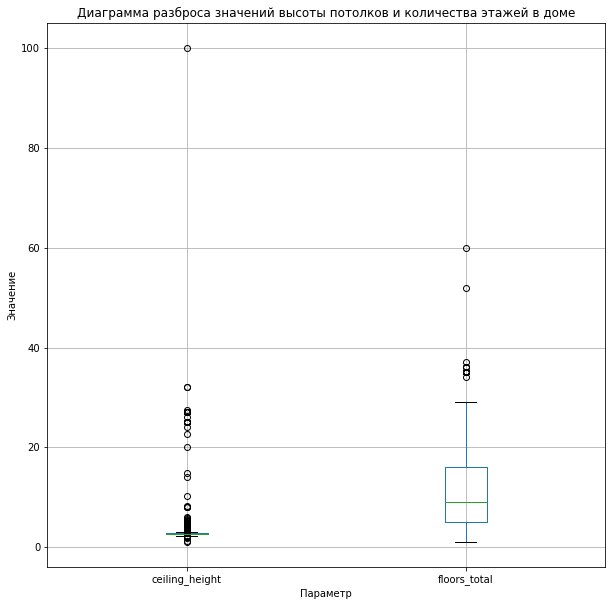

In [362]:
# Изучим диаграммы ящик с усами для высоты потолков и количесва этажей в доме
data.boxplot(['ceiling_height', 'floors_total'], figsize=(10,10))
plt.title('Диаграмма разброса значений высоты потолков и количества этажей в доме')
plt.ylabel('Значение')
plt.xlabel('Параметр')

In [363]:
#Изучим количество выбросов
(data[data['floors_total'] > 32]).value_counts().count()

3

Количество выбросов не превышает 10%, соотвественно их можно удалять.

In [364]:
#Удалим из датасета строки с выбросами в столбце 'floors_total'
data = data[data['floors_total'] < 32]

In [365]:
#Выведем строки, в которых высота потолков выше 22м(2.2м) для ознакомления
data[data['ceiling_height'] >= 22]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new
355,17,3600000.0,55.2,2018-07-12,2,25.0,5,32.0,2,False,...,2,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0,Гатчина
3148,14,2900000.0,75.0,2018-11-12,3,32.0,3,53.0,2,True,...,0,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Волхов
4643,0,4300000.0,45.0,2018-02-01,2,25.0,9,30.0,2,True,...,1,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0,Санкт-Петербург
4876,7,3000000.0,25.0,2017-09-27,0,27.0,25,17.0,17,True,...,2,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0,посёлок Мурино
5076,0,3850000.0,30.5,2018-10-03,1,24.0,5,19.5,1,True,...,0,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0,Санкт-Петербург
5246,0,2500000.0,54.0,2017-10-13,2,27.0,5,30.0,3,True,...,2,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0,деревня Мины
5669,4,4400000.0,50.0,2017-08-08,2,26.0,9,21.3,3,True,...,2,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0,Санкт-Петербург
6246,6,3300000.0,44.4,2019-03-25,2,25.0,5,31.3,5,True,...,0,Кронштадт,68923.0,50649.0,1.0,417.0,2.0,73.0,NaN,Кронштадт
9379,5,3950000.0,42.0,2017-03-26,3,25.0,5,30.0,2,True,...,0,Санкт-Петербург,11647.0,13581.0,0.0,NaN,0.0,NaN,NaN,Санкт-Петербург
10773,8,3800000.0,58.0,2017-10-13,2,27.0,10,30.1,3,False,...,2,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,71.0,посёлок Мурино


- предполагаю, что в числа, лежащие в диапозоне от `22м` до `35м` - являются ошибкой в записи или же технологическая ошибка при выгрузке
- удалим строку с высотой потолков в `100м`
- удалим строки, в которых значение высоты варьируется от `4 метров` (не включительно) до `22 метров`(больше `4` в нормальных - - условиях не бывает, а если делить числа меньше `22 - ти`, то уже нереалистично мало)

In [366]:
#Поделим на 10 числа, лежащие в диапозоне от 22м до 35м
data.loc[(data['ceiling_height'] <= 35) & (data['ceiling_height'] >= 22), 'ceiling_height'] = \
data.loc[(data['ceiling_height'] <= 35) & (data['ceiling_height'] >= 22), 'ceiling_height'] / 10

#Удалим также все строки, у которых указана этажность здания больше 32, еще и другой город Кронштадт попал в выборку
#Также удалим строки, в которых высота потолка меньше 2.2м
data = data[(data['ceiling_height'] <= 4) & (data['ceiling_height'] >= 2.2)] 

Text(0, 0.5, 'Значение цены (млн)')

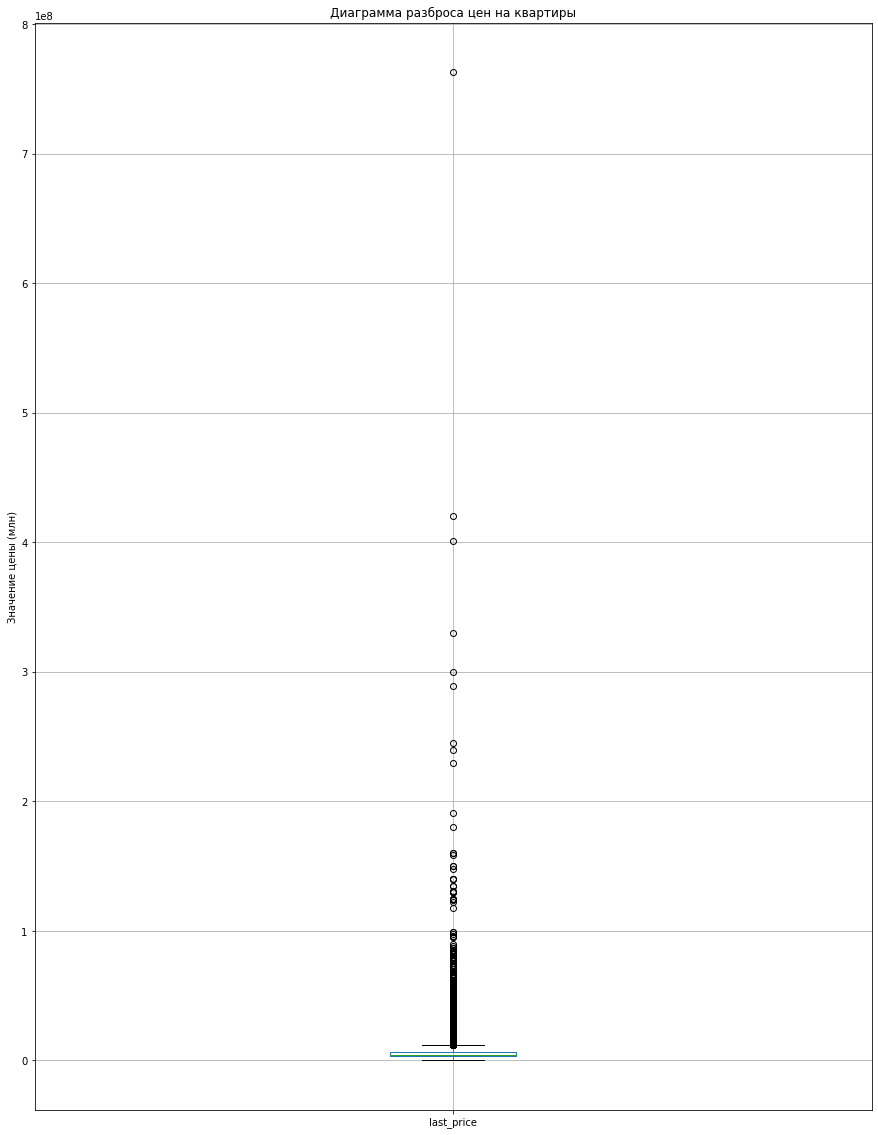

In [367]:
#Изучим диаграмму размаха цены продажи недвижимости
data.boxplot('last_price', figsize=(15,20))
plt.title('Диаграмма разброса цен на квартиры')
plt.ylabel('Значение цены (млн)')


In [368]:
data[data['last_price'] >= 11897500].count()

total_images            2023
last_price              2023
total_area              2023
first_day_exposition    2023
rooms                   2023
ceiling_height          2023
floors_total            2023
living_area             2023
floor                   2023
is_apartment            2023
studio                  2023
open_plan               2023
kitchen_area            2021
balcony                 2023
locality_name           2023
airports_nearest        1986
cityCenters_nearest     1995
parks_around3000        1995
parks_nearest           1333
ponds_around3000        1995
ponds_nearest           1311
days_exposition         1488
locality_name_new       2023
dtype: int64

Выбросы составляют менее 10-ти процентов, значит их можно удалять.

In [369]:
#Удаляем выбросы
data = data[data['last_price'] <= 11897500]

Text(0, 0.5, 'Площадь (м2)')

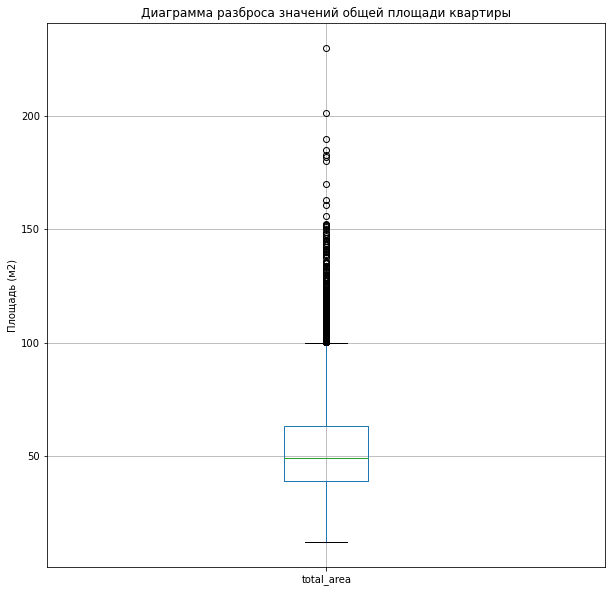

In [370]:
# Изучим диаграммы ящик с усами для общей площади
data.boxplot('total_area', figsize=(10,10))
plt.title('Диаграмма разброса значений общей площади квартиры')
plt.ylabel('Площадь (м2)')


In [371]:
data[data['total_area'] >= 114.5].count()

total_images            178
last_price              178
total_area              178
first_day_exposition    178
rooms                   178
ceiling_height          178
floors_total            178
living_area             178
floor                   178
is_apartment            178
studio                  178
open_plan               178
kitchen_area            178
balcony                 178
locality_name           178
airports_nearest        151
cityCenters_nearest     151
parks_around3000        151
parks_nearest            89
ponds_around3000        151
ponds_nearest            84
days_exposition         154
locality_name_new       178
dtype: int64

Выбросы составляют менее 10 - ти процентов, значит их можно удалять.

In [372]:
#Удаляем выбросы
data = data[data['total_area'] <= 114.5]

Text(0, 0.5, 'Количество комнат')

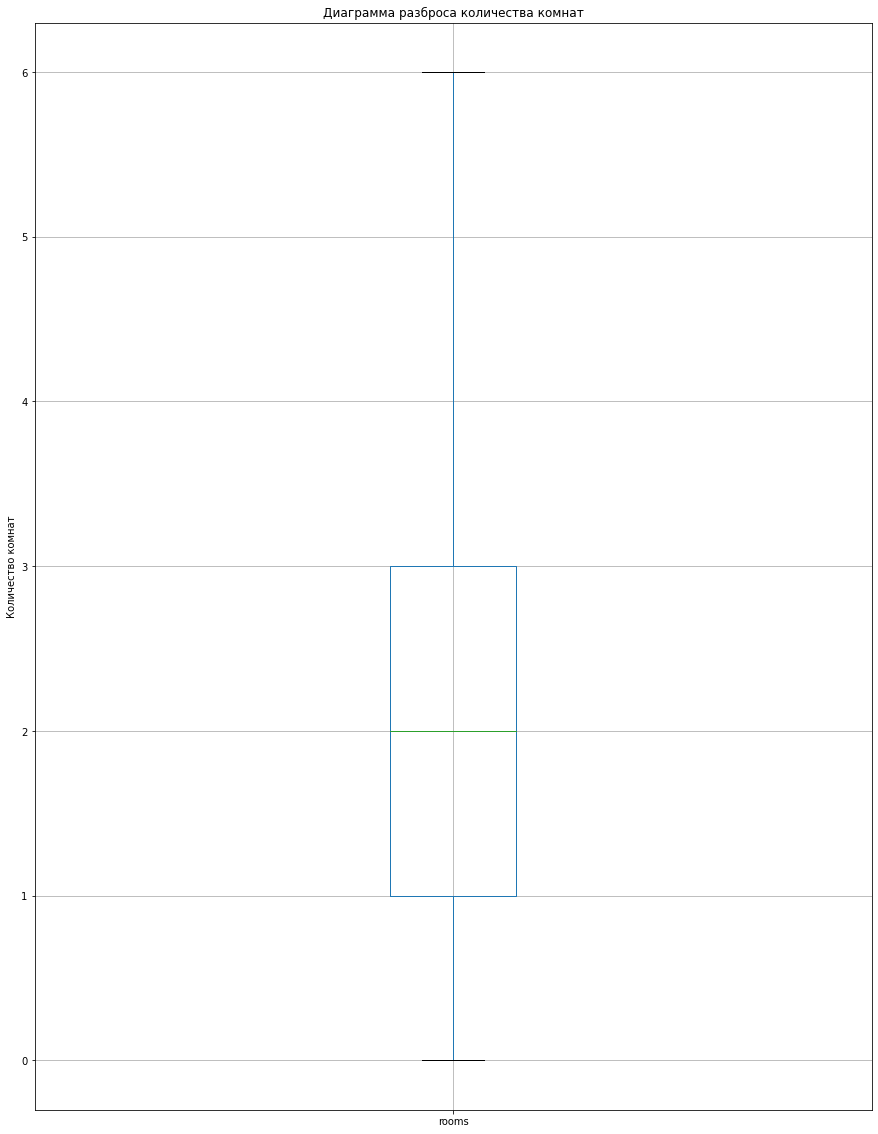

In [373]:
#Изучим диаграммы ящик с усами для количества комнат
data.boxplot('rooms', figsize=(15,20))
plt.title('Диаграмма разброса количества комнат')
plt.ylabel('Количество комнат')


In [374]:
#Напишем код для отображения всех столбцов и проверки гипотезы о том, что квартиры с количеством комнат равным 0 - это студии
print(data[data['rooms'] == 0].value_counts())
data[(data['rooms'] == 0) & (data['studio'] == True)].head(30)

Series([], dtype: int64)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new
144,1,2450000.0,27.00,2017-03-30,0,2.75,24,15.50,2,True,...,2,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0,посёлок Мурино
440,8,2480000.0,27.11,2018-03-12,0,2.70,17,24.75,4,True,...,2,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0,Санкт-Петербург
608,2,1850000.0,25.00,2019-02-20,0,2.60,10,18.00,7,True,...,0,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0,посёлок Шушары
697,12,2500000.0,24.10,2017-12-01,0,2.75,25,17.50,21,True,...,0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,201.0,деревня Кудрово
716,5,1500000.0,17.00,2017-06-07,0,2.70,9,12.00,1,True,...,0,посёлок Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0,посёлок Шушары
1173,12,3240000.0,29.00,2018-10-30,0,2.75,24,17.00,2,True,...,2,Санкт-Петербург,35129.0,16293.0,0.0,NaN,1.0,475.0,13.0,Санкт-Петербург
1174,3,3900000.0,32.00,2016-10-18,0,2.70,24,18.00,2,True,...,2,Санкт-Петербург,44754.0,8409.0,1.0,609.0,0.0,NaN,540.0,Санкт-Петербург
1220,5,3300000.0,27.00,2017-11-10,0,2.80,17,20.00,16,True,...,0,Санкт-Петербург,12507.0,12419.0,0.0,NaN,1.0,528.0,113.0,Санкт-Петербург
1260,0,2600000.0,27.00,2018-07-20,0,2.70,16,16.00,4,True,...,2,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,102.0,Кудрово
1277,10,3150000.0,26.00,2017-07-14,0,2.75,21,17.38,11,True,...,0,Санкт-Петербург,48847.0,16685.0,0.0,NaN,0.0,NaN,622.0,Санкт-Петербург


Количество комнат может быть равным нулю, потому что так обозначаются студии.

In [375]:
data[data['rooms'] > 6].count()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
locality_name_new       0
dtype: int64

Количество выбросов менее 10 - ти процентов, следовательно их можно удалить

In [376]:
data = data[data['rooms'] < 6]

In [377]:
#Удалим объявления о продаже, которые продавались дольше 512 дней
data = data[data['days_exposition'] < 512.5]

### Добавление новых столбцов


In [378]:
#Добавим столбец 'one_m2' в котором будет отражаться цена за 1 квадратный метр
data['one_m2'] = round(data['last_price'] / data['total_area'], 2)
# Добавим столбец 'week_day' в котором будет отображаться
#день недели публикации объявления (0 — понедельник, 1 — вторник и т.д.)
data['week_day'] = data['first_day_exposition'].dt.weekday
#Месяц публикации
data['month_exposition'] = data['first_day_exposition'].dt.month
#Год публикации
data['year_exposition'] = data['first_day_exposition'].dt.year
#Расстояние до центра в киллометрах
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest'] / 1000)

In [379]:
#Напишем функцию для определения типа этажа
def type_floor(row):
    floor = row['floor']
    all_f = row['floors_total']
    if floor == all_f:
        return 'последний'
    
    elif floor == 1:
        return 'первый'
    
    return 'другой'
#Создадим новый столбец с типом этажа
data['type_floor'] = data.apply(type_floor, axis=1)
#Выведем первые 15 строк, посмотрим, все ли добавилось
data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,locality_name_new,one_m2,week_day,month_exposition,year_exposition,cityCenters_nearest_km,type_floor
1,7,3350000.0,40.40,2018-12-04,1,2.75,11,18.60,1,True,...,0.0,NaN,81.0,посёлок Шушары,82920.79,1,12,2018,19.0,первый
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,True,...,1.0,48.0,121.0,Санкт-Петербург,100000.00,1,6,2018,8.0,другой
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,True,...,NaN,NaN,55.0,посёлок Янино-1,95065.79,0,9,2018,NaN,другой
6,6,3700000.0,37.30,2017-11-02,1,2.66,26,10.60,6,True,...,0.0,NaN,155.0,посёлок Парголово,99195.71,3,11,2017,19.0,другой
8,20,2900000.0,33.16,2018-05-23,1,2.70,27,15.43,26,True,...,NaN,NaN,189.0,посёлок Мурино,87454.76,2,5,2018,NaN,другой
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,True,...,0.0,NaN,289.0,Санкт-Петербург,88524.59,6,2,2017,15.0,другой
10,5,5050000.0,39.60,2017-11-16,1,2.67,12,20.30,3,True,...,2.0,553.0,137.0,Санкт-Петербург,127525.25,3,11,2017,14.0,другой
11,9,3300000.0,44.00,2018-08-27,2,2.55,5,31.00,4,False,...,0.0,NaN,7.0,Ломоносов,75000.00,0,8,2018,52.0,другой
12,10,3890000.0,54.00,2016-06-30,2,2.55,5,30.00,5,True,...,NaN,NaN,90.0,Сертолово,72037.04,3,6,2016,NaN,последний
13,20,3550000.0,42.80,2017-07-01,2,2.56,5,27.00,5,True,...,3.0,298.0,366.0,Петергоф,82943.93,5,7,2017,33.0,последний


[Описание проекта](#introduction)

## Исследовательский анализ данных

<a id="analyzing"></a>

#### Анализ общей площади, жилой площади, площади кухни и цены продажи

In [380]:
#Сохраним названия нужных столбцов для цикла
col_for_analysis = ['total_area', 'living_area', 'kitchen_area', 'last_price']
data[col_for_analysis].describe()

,total_area,living_area,kitchen_area,last_price
count,17337.000000,17337.000000,17169.000000,1.733700e+04
mean,51.770645,29.542903,9.466604,4.704668e+06
std,17.310814,12.428230,3.478082,2.096795e+06
min,12.000000,2.000000,2.000000,1.219000e+04
25%,38.240000,18.000000,7.000000,3.300000e+06
50%,48.000000,29.000000,9.000000,4.300000e+06
75%,62.000000,38.000000,10.800000,5.800000e+06
max,114.500000,91.785000,50.000000,1.189440e+07


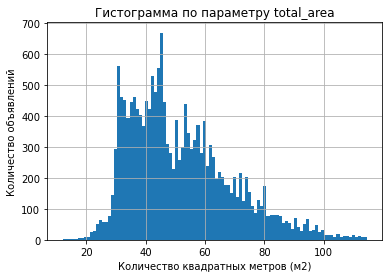

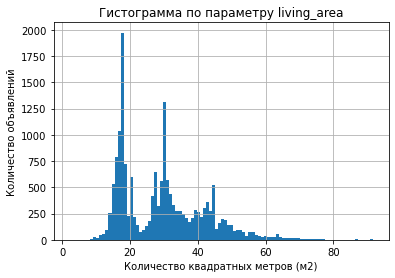

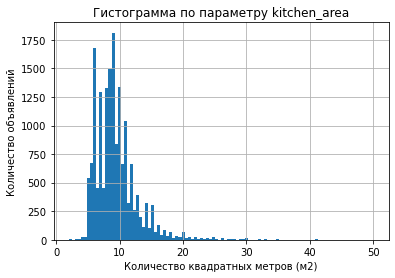

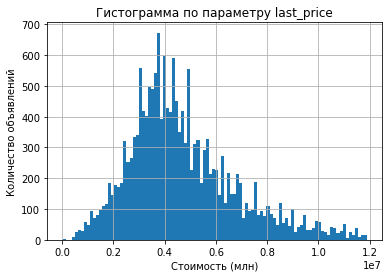

In [381]:
#Напишем цикл для вывода гистограмм по необходимым нам колонкам
for column in col_for_analysis:
    data.hist(column, bins=100)
    plt.title(f'Гистограмма по параметру {column}')
    if 'area' in column:
        plt.xlabel('Количество квадратных метров (м2)')
    else:
        plt.xlabel('Стоимость (млн)')
    plt.ylabel('Количество объявлений')

*Общая площадь*

Межквартильный размах лежит в границах от 40м2 до 52м2, график это подтверждает. График симметричен - поддается нормальному распределению.

*Жилая площадь*

Межквартильный размах лежит в границах от 18,6м2 до 42,2м2, график это подтверждает. При детальном рассмотрении наблюдается два пика, можно предположить, что так происходит из-за особенностей продаваемого жилфонда, значения, которые ближе к 20ти относятся к недвижимости из старого жилфонда, а после - к новому жилфонду, тем не менее, должна прослеживаться корреляция между общей площадью и жилой, если это так, то полученный график не должен вызывать вопросов.

In [382]:
#Посчитаем коэффициент корреляции Пирсона между общей и жилой площадью
round(data['total_area'].corr(data['living_area']), 2)

0.89

Да, так и есть, коэффициент корреляции Пирсона стремится к единице, значит между переменными существует сильная положительная связь.

*Площадь кухни*

Межквартильный размах лежит в границах от 7м2 до 11м2. График поддается нормальному распределению, основнаяч масса значений лежит у 10м2.

In [383]:
round(data['kitchen_area'].corr(data['total_area']), 2)

0.4

Корреляция между площадью кухни и общей площадью есть, но она явно слабее, чем корреляция общей площади с жилой.

*Цена продажи*

График симметричен - поддается нормальному распределению, основная масса значений лежит у 4.5млн.руб. Межквартильный размах лежит в диапозоне от 3.4 до 6.75 млн.руб.

#### Анализ количества комнат

count    17337.000000
mean         1.873450
std          0.873465
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          5.000000
Name: rooms, dtype: float64


Text(0, 0.5, 'Количество объявлений')

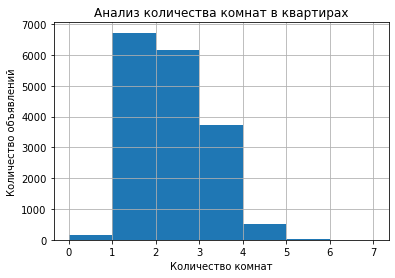

In [384]:
print(data['rooms'].describe())
#Сразу поставим количество корзинок 7, чтобы было удобнее изучать данные
data.hist('rooms', range=(0,7), bins=7)
plt.title('Анализ количества комнат в квартирах')
plt.xlabel('Количество комнат')
plt.ylabel('Количество объявлений')

График симметричен. Основная масса значений лежит в межквартильном размахе от 1 комнады до 3-х, очень похоже на реальное положение дел.

In [385]:
#Выведем количество квартир по каждому количеству комнат
data['rooms'].value_counts()

1    6725
2    6162
3    3732
4     515
0     168
5      35
Name: rooms, dtype: int64

#### Анализ высоты потолков

count    17337.000000
mean         2.674905
std          0.181987
min          2.200000
25%          2.550000
50%          2.650000
75%          2.750000
max          4.000000
Name: ceiling_height, dtype: float64


Text(0, 0.5, 'Количество объявлений')

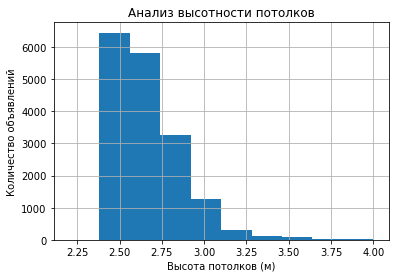

In [386]:
print(data['ceiling_height'].describe())
data.hist('ceiling_height')
plt.title('Анализ высотности потолков')
plt.xlabel('Высота потолков (м)')
plt.ylabel('Количество объявлений')

In [387]:
#Выведем количество квартир по высоте потолков
data['ceiling_height'].value_counts().head()

2.55    3522
2.50    2667
2.70    2559
2.75    1962
2.60    1803
Name: ceiling_height, dtype: int64

Как и предыдущий, график не симметричен - но также очень похож на реальную картину мира, межквартильный размах лежит в диапозоне от 2.55м до 2.75м, самые часто встречаемые квартиры в продаже имеют высоту потолков близкую к 2.5м.

#### Анализ этажа продаваемой квартиры

count    17337.000000
mean         5.997520
std          4.935479
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         27.000000
Name: floor, dtype: float64


Text(0, 0.5, 'Количество объявлений')

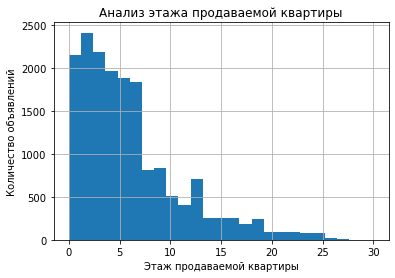

In [388]:
print(data['floor'].describe())
data.hist('floor', range = (0,30),bins=25)
plt.title('Анализ этажа продаваемой квартиры')
plt.xlabel('Этаж продаваемой квартиры')
plt.ylabel('Количество объявлений')

График частично напоминает колокол - можно назвать его симметричным от части(соответсвует нормальному распределению), межквартильный размах лежит в диапозоне от 2 до 8.

#### Анализ типа этажа продаваемой квартиры

Для проведения такого анализа необходимо привести строковые значения в числовые для этого обозначим значения так:
- первый - 1
- последний - 2
- другой - 0

Для этого напишем функцию и применим ее.

Text(0, 0.5, 'Количество объявлений')

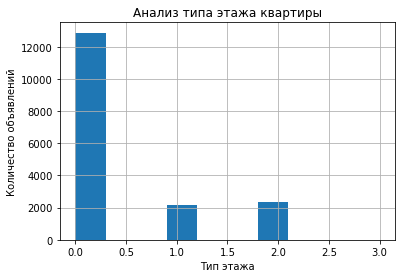

In [389]:
def type_floor_n(row):
    type_f = row['type_floor']
    if type_f == 'первый':
        return 1
    elif type_f == 'последний':
        return 2
    return 0
#Создадим новый столбец с численным обозначением
data['type_floor_num'] = data.apply(type_floor_n, axis=1) 
data.hist('type_floor_num',range=(0,3))
plt.title('Анализ типа этажа квартиры')
plt.xlabel('Тип этажа')
plt.ylabel('Количество объявлений')

На графике видно, что большую часть выставленных на продажу квартир находятся не на первом и последнем этажах, выявим долю каждого типа:

In [390]:
type_fl_pivot= data.pivot_table(index='type_floor', values='type_floor_num', aggfunc = 'count')
type_fl_pivot['percent_of_sum'] = round((type_fl_pivot['type_floor_num'] / data['type_floor_num'].count()) * 100, 2)
type_fl_pivot = type_fl_pivot.rename(columns={'type_floor_num': 'count_of_flats'})
type_fl_pivot

,count_of_flats,percent_of_sum
type_floor,,
другой,12873,74.25
первый,2135,12.31
последний,2329,13.43


#### Анализ количества этажей

count    17337.000000
mean        10.990771
std          6.639293
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         29.000000
Name: floors_total, dtype: float64


Text(0, 0.5, 'Количество объявлений')

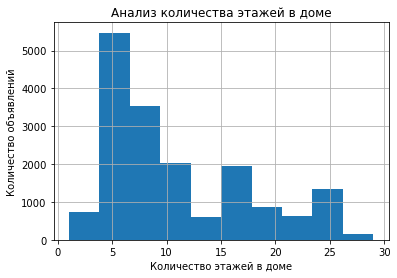

In [391]:
print(data['floors_total'].describe())
data.hist('floors_total')
plt.title('Анализ количества этажей в доме')
plt.xlabel('Количество этажей в доме')
plt.ylabel('Количество объявлений')

График частично напоминает колокол - можно назвать его симметричным от части(соответсвует нормальному распределению), межквартильный размах лежит в диапозоне от 5 до 16. Опять же, совпадает с действительностью более чем, большинство домов - это 5 - 10 этажные.

#### Анализ расстояния до центра города

count    13081.000000
mean     15067.964376
std       8345.524471
min        208.000000
25%      10820.000000
50%      13701.000000
75%      16704.000000
max      64857.000000
Name: cityCenters_nearest, dtype: float64


Text(0, 0.5, 'Количество объявлений')

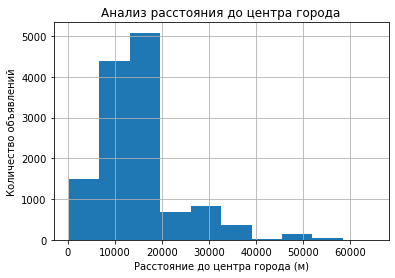

In [392]:
print(data['cityCenters_nearest'].describe())
data.hist('cityCenters_nearest')
plt.title('Анализ расстояния до центра города')
plt.xlabel('Расстояние до центра города (м)')
plt.ylabel('Количество объявлений')

График частично напоминает колокол - можно назвать его симметричным от части(соответсвует нормальному распределению), межквартильный размах лежит в диапозоне от 10820м до 16704м.

Text(0, 0.5, 'Количество объявлений')

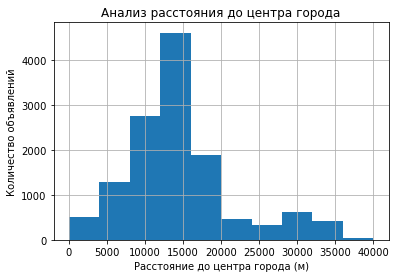

In [393]:
data.hist('cityCenters_nearest', range=(0,40000))
plt.title('Анализ расстояния до центра города')
plt.xlabel('Расстояние до центра города (м)')
plt.ylabel('Количество объявлений')

#### Анализ расстояния до аэропорта

count    13069.000000
mean     29050.401944
std      13081.261007
min          0.000000
25%      17950.000000
50%      27380.000000
75%      38092.000000
max      83758.000000
Name: airports_nearest, dtype: float64


Text(0, 0.5, 'Количество объявлений')

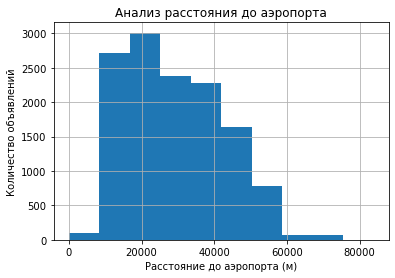

In [394]:
print(data['airports_nearest'].describe())
data.hist('airports_nearest')
plt.title('Анализ расстояния до аэропорта')
plt.xlabel('Расстояние до аэропорта (м)')
plt.ylabel('Количество объявлений')

График симметричен - поддается нормальному распределению, межквартильный размах находится вы диапозоне от 18км до 38|км (или же на таком расстоянии находятся продававшиеся квартиры от ближайших аэропортов).

#### Анализ расстояния до парков

count    5336.000000
mean      484.933283
std       322.529490
min         1.000000
25%       288.000000
50%       454.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64


Text(0, 0.5, 'Количество объявлений')

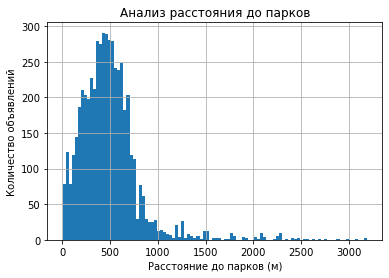

In [395]:
print(data['parks_nearest'].describe())
data.hist('parks_nearest', bins=100)
plt.title('Анализ расстояния до парков')
plt.xlabel('Расстояние до парков (м)')
plt.ylabel('Количество объявлений')

График симметричен - поддается нормальному распределению, межквартильный размах находится вы диапозоне от 288м до 612м (или же на таком расстоянии находятся продававшиеся квартиры от ближайших парков).

#### Анализ дня публикации

count    17337.000000
mean         2.593067
std          1.788998
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: week_day, dtype: float64


Text(0, 0.5, 'Количество объявлений')

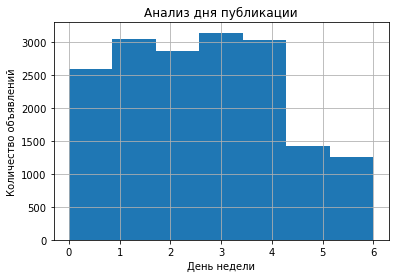

In [396]:
print(data['week_day'].describe())
data.hist('week_day', bins=7)
plt.title('Анализ дня публикации')
plt.xlabel('День недели')
plt.ylabel('Количество объявлений')

В выходные дни меньше всего выставляли объявлений о продаже недвиждимости, можно сделать предположение о том, что люди предпочитают выставлять объявления в рабочие дни недели.

#### Анализ месяца публикации

count    17337.000000
mean         6.599815
std          3.489300
min          1.000000
25%          3.000000
50%          7.000000
75%         10.000000
max         12.000000
Name: month_exposition, dtype: float64


Text(0, 0.5, 'Количество объявлений')

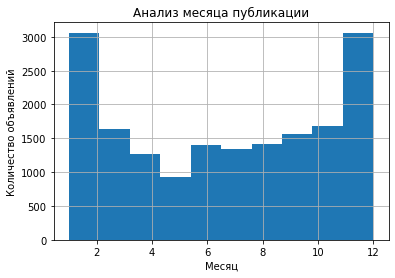

In [397]:
print(data['month_exposition'].describe())
data.hist('month_exposition',range=(1,12))
plt.title('Анализ месяца публикации')
plt.xlabel('Месяц')
plt.ylabel('Количество объявлений')

In [398]:
#Выведем точное значение объявлений в каждый месяц
data['month_exposition'].value_counts().sort_values()

5      928
1     1094
12    1211
4     1271
7     1337
6     1396
8     1409
9     1559
3     1631
10    1686
11    1850
2     1965
Name: month_exposition, dtype: int64

Чаще всего объявления о продаже выставляли в начале года - февраль(2613), март(2553), апрель(2346) и в конце - сентябрь(1945), октябрь(2090), ноябрь(2325).

#### Как быстро продавались квартиры

count    17337.000000
mean       125.232739
std        119.637890
min          1.000000
25%         40.000000
50%         80.000000
75%        178.000000
max        512.000000
Name: days_exposition, dtype: float64


Text(0, 0.5, 'Количество объявлений')

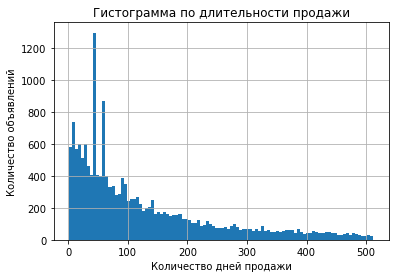

In [399]:
print(data['days_exposition'].describe())
data.hist('days_exposition', bins=100)
plt.title('Гистограмма по длительности продажи')
plt.xlabel('Количество дней продажи')
plt.ylabel('Количество объявлений')

Быстрыми продажами можно считать те, которые были совершенны за срок не более 40 дней, а необычно долгими те, которые длились дольше 178 дней.
Квартира, которая продавалась дольше всех, продавалась 500 дней(чуть меньше 2х лет)!

#### Влияние факторов на стоимость объекта

Корреляция для цены квартиры и total_area составляет 0.699
Корреляция для цены квартиры и living_area составляет 0.546
Корреляция для цены квартиры и kitchen_area составляет 0.45


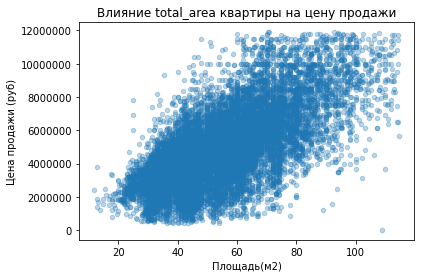

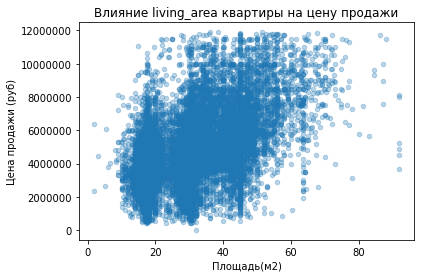

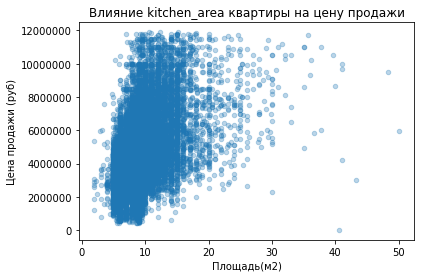

In [400]:
#Напишем цикл для построения точечных диаграмм, отражающих
#зависимость цены от различных площадей
area_columns = ['total_area', 'living_area', 'kitchen_area']
for column in area_columns:
    #Построим точечную диаграмму
    
    data.plot(x=column, y='last_price', kind='scatter', alpha=0.3)
    plt.title(f'Влияние {column} квартиры на цену продажи')
    plt.xlabel('Площадь(м2)')
    plt.ylabel('Цена продажи (руб)')
    plt.ticklabel_format(style='plain')
    #Изучим корреляцию цены от общей площади
    corr = round(data[column].corr(data['last_price']), 3)
    print(f'Корреляция для цены квартиры и {column} составляет {corr}') 

Корреляция в 0.7 говорит о наличии связи, однако не слишком сильной. Выходит, увеличение общей площади сопровождается прибавкой в цене, но не всегда, значит цена зависит и от других факторов.

Также, как и общая площадь, жилая площадь положительно коррелирует с ценой(0,55) - это говорит о наличии связи, однако не слишком сильной. Выходит, увеличение жилой площади сопровождается прибавкой в цене, но не всегда, значит цена зависит и от других факторов.

Как и общая площадь, площадь кухни положительно коррелирует с ценой(0,45) - это говорит о наличии связи, однако не слишком сильной. Выходит, увеличение жилой площади сопровождается прибавкой в цене, но не всегда, значит цена зависит и от других факторов.

Корреляция для цены квартиры и rooms составляет 0.44
Корреляция для цены квартиры и week_day составляет -0.007
Корреляция для цены квартиры и month_exposition составляет 0.006
Корреляция для цены квартиры и year_exposition составляет 0.007


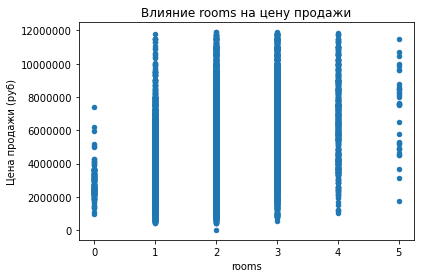

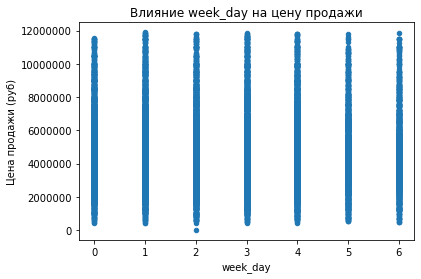

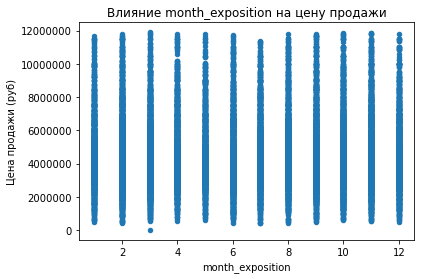

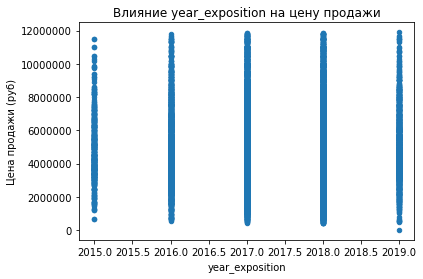

In [401]:
#Напишем цикл для построения точечных диаграмм, отражающих
#зависимость цены от различных площадей
columns_analysis = ['rooms', 'week_day', 'month_exposition', 'year_exposition']
for column in columns_analysis:
    #Построим точечную диаграмму
    data.plot(x=column, y='last_price', kind='scatter')
    plt.title(f'Влияние {column} на цену продажи')
    plt.xlabel(column)
    plt.ylabel('Цена продажи (руб)')
    plt.ticklabel_format(style='plain')
    #Изучим корреляцию цены от общей площади
    corr = round(data[column].corr(data['last_price']), 3)
    print(f'Корреляция для цены квартиры и {column} составляет {corr}') 

- Количество комнат, влияет на стоимость квартиры (коэффициент корреляции 0.44), но это не определяющий фактор;
- Цена не зависит от дня неделели, в который выставили объявление;
- Цена не зависит от месяца, в который выставили объявление;
- Цена не зависит от года, в который выставили объявление. Единственное, что можно отметить, так это то, что количество объявлений за 2014 год в датасете меньше, чем за последующие;
- С каждым годом цены на квартиры растут - тут уже свою роль отрабатывает инфляция.

#### Топ-10 самых дорогих и дешевых населенных пунктов по средней цене за 1 квадратный метр

In [402]:
#Составим сводную таблицу с названиями районов и средней стоимостью одного квадратного метра
avg_price_one_m2 = (data
                    .pivot_table(index='locality_name_new', values='one_m2', aggfunc='mean')
                    .sort_values(by='one_m2',ascending = False))
avg_price_one_m2['one_m2'] = round(avg_price_one_m2['one_m2'])

In [403]:
avg_price_one_m2.head(10)

,one_m2
locality_name_new,
посёлок Лисий Нос,113728.0
Санкт-Петербург,104486.0
Зеленогорск,103196.0
Сестрорецк,101518.0
Пушкин,99275.0
Кудрово,98073.0
посёлок Левашово,96998.0
деревня Мистолово,96157.0
посёлок Репино,92727.0


Text(0, 0.5, 'Цена одного м2 (руб)')

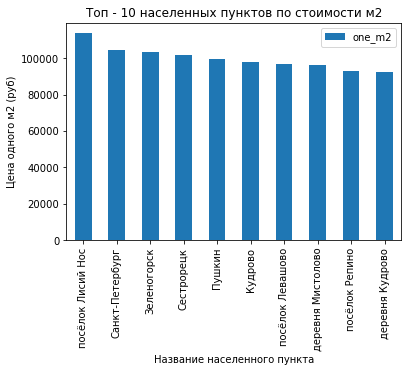

In [404]:
avg_price_one_m2.head(10).plot(y='one_m2', kind='bar')
plt.title(f'Топ - 10 населенных пунктов по стоимости м2')
plt.xlabel('Название населенного пункта')
plt.ylabel('Цена одного м2 (руб)')

Средняя цена квадратного метра в неизвестных районах('Без названия'), входит в топ - 10, скорее всего эти объявления с неизвестным местонахожением, находятся не так далеко от Санкт-Петербурга.

In [405]:
avg_price_one_m2.tail(10)

,one_m2
locality_name_new,
посёлок Житково,14956.0
деревня Ям-Тесово,13712.0
деревня Бор,13158.0
посёлок Тёсово-4,12931.0
деревня Малая Романовка,12725.0
посёлок Совхозный,12629.0
деревня Выскатка,12335.0
деревня Вахнова Кара,11688.0
посёлок Свирь,11481.0


Text(0, 0.5, 'Цена одного м2 (руб)')

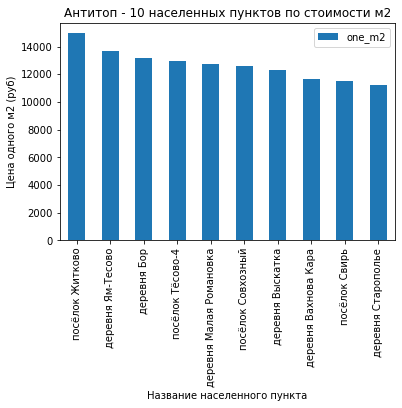

In [406]:
avg_price_one_m2.tail(10).plot(y='one_m2', kind='bar')
plt.title(f'Антитоп - 10 населенных пунктов по стоимости м2')
plt.xlabel('Название населенного пункта')
plt.ylabel('Цена одного м2 (руб)')

#### Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [407]:
avg_price_one_m2['count_of_ad'] = data['locality_name_new'].value_counts()
avg_price_one_m2.sort_values(by='count_of_ad', ascending = False).head(10).sort_values(by='one_m2', ascending = False)

,one_m2,count_of_ad
locality_name_new,,
Санкт-Петербург,104486.0,11079
Пушкин,99275.0,257
деревня Кудрово,92600.0,267
посёлок Парголово,89337.0,287
посёлок Мурино,85921.0,515
посёлок Шушары,77794.0,384
Колпино,74508.0,291
Гатчина,68275.0,241
Всеволожск,66738.0,304


Text(0, 0.5, 'Цена одного м2 (руб)')

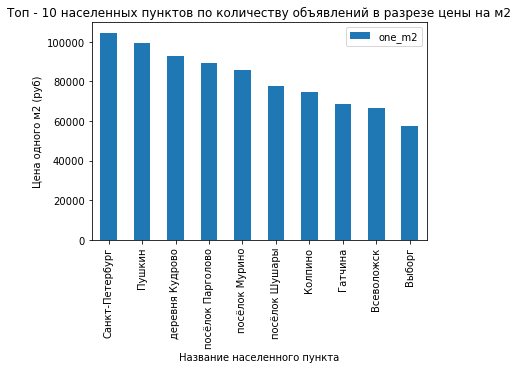

In [408]:
(avg_price_one_m2.sort_values(by='count_of_ad', ascending = False).head(10).sort_values(by='one_m2', ascending = False)).plot(y='one_m2', kind='bar')
plt.title(f'Топ - 10 населенных пунктов по количеству объявлений в разрезе цены на м2')
plt.xlabel('Название населенного пункта')
plt.ylabel('Цена одного м2 (руб)')

#### Cредняя цену каждого километра

In [409]:
avg_price_center_km1 = data.pivot_table(index='cityCenters_nearest_km', values= 'last_price', aggfunc='mean').astype('int')
avg_price_center_km1.index = avg_price_center_km1.index.astype('int')
avg_price_center_km1

,last_price
cityCenters_nearest_km,
0,7622500
1,7972955
2,7647916
3,6913382
4,7252975
5,7386955
6,6874107
7,6539028
8,6360283


Text(0, 0.5, 'Цена продажи (руб)')

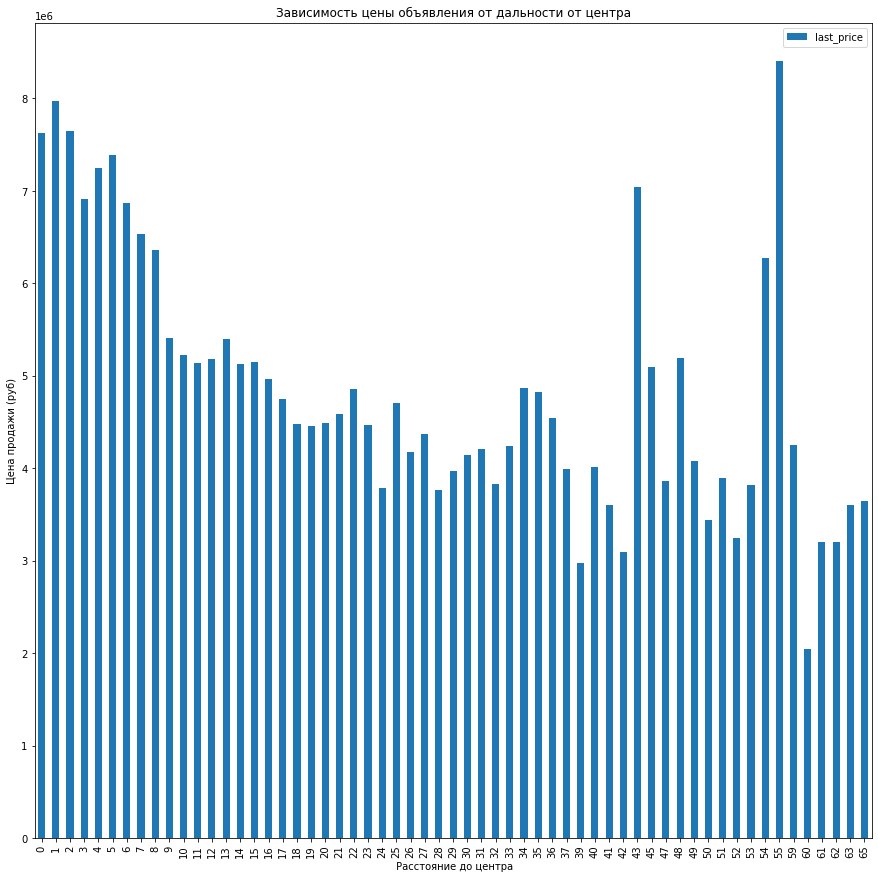

In [410]:
avg_price_center_km1.plot(y='last_price', kind='bar', figsize=(15, 15))
plt.title(f'Зависимость цены объявления от дальности от центра')
plt.xlabel(' Расстояние до центра')
plt.ylabel('Цена продажи (руб)')

Между расстоянием от центра и  ценой недвижимости прослеживается отрицательная корреляция, чем дальше расстояние от центра, тем дешевле стоят квартиры. Есть исключения на 43, 54 и 55 км, но это скорее выбросы.

[Описание проекта](#introduction)

## Вывод

<a id="end"></a>


- *Выявили следующие зависимости в данных:*

    - общая площадь - межквартильный размах лежит в границах от 40м2 до 52м2, график это подтверждает;
    
    - жилая площадь - межквартильный размах лежит в границах от 18.6м2 до 42.2м2 , график это подтверждает;
    
    - площадь кухни - Межквартильный размах лежит в границах от 7м2 до 12м2;
    
    - цена объекта - Межквартильный размах лежит в диапозоне от 3.4 до 6.75 млн.руб.;
    
    - количество комнат - основная масса значений лежит в межквартильном размахе от 1 комнады до 3-х, очень похоже на реальное положение дел;
    
    - высота потолков - межквартильный размах лежит в диапозоне от 2.55м до 2.75м, самые часто встречаемые квартиры в продаже имеют высоту потолков близкую к 2.5м;
    
    - этаж квартиры - межквартильный размах лежит в диапозоне от 2 до 8;
    
    - тип этажа квартиры («первый», «последний», «другой») - большую часть выставленных на продажу квартир находятся не на первом и последнем этажах;
    
    - общее количество этажей в доме - межквартильный размах лежит в диапозоне от 5 до 16. Опять же, совпадает с действительностью более чем, большинство домов - это 5 - 10 этажные;
    
    - расстояние до центра города в метрах - межквартильный размах лежит в диапозоне от 10820м до 16704м.;
    
    - расстояние до ближайшего аэропорта - межквартильный размах находится вы диапозоне от 18км до 38км;
    
    - расстояние до ближайшего парка - межквартильный размах находится вы диапозоне от 288м до 612м;
    
    - день публикации объявления - в выходные дни меньше всего выставляли объявлений о продаже недвиждимости, можно сделать предположение о том, что люди предпочитают выставлять объявления в рабочие дни недели;
    
    - месяц публикации объявления - чаще всего объявления о продаже выставляли в начале года - февраль(2613), март(2553), апрель(2346) и в конце - сентябрь(1945), октябрь(2090), ноябрь(2325).

*Выявили влияние факторов на конечную цену квартиры:*

- общая площадь - корреляция в 0.7 говорит о наличии связи, однако не слишком сильной. Выходит, увеличение общей площади сопровождается прибавкой в цене, но не всегда, значит цена зависит и от других факторов;  
- жилая площадь - также, как и общая площадь, жилая площадь положительно коррелирует с ценой(0,55) - это говорит о наличии связи, однако не слишком сильной. Выходит, увеличение жилой площади сопровождается прибавкой в цене, но не всегда, значит цена зависит и от других факторов;
- площадь кухни - также, как и общая площадь, площадь кухни положительно коррелирует с ценой(0,45) - это говорит о наличии связи, однако не слишком сильной. Выходит, увеличение жилой площади сопровождается прибавкой в цене, но не всегда, значит цена зависит и от других факторов;
- количество комнат - количество комнат, влияет на стоимость квартиры (коэффициент корреляции 0.44), но это не определяющий фактор в меньшей степени, чем площадь квартиры;
- этаж, на котором расположена квартира (первый, последний, другой) - квартиры на первом этаже стоят дешевле, чеми квартиры на последнем и других этажах;
- Между днем, месяцем, годом выставления объявления и ценой нету корреляции.

*Выявили следующие показатели:*
- топ-10 самых дорогих и дешевых населенных пунктов по средней цене за 1 квадратный метр;

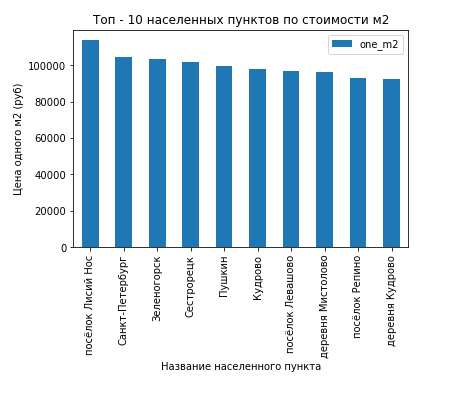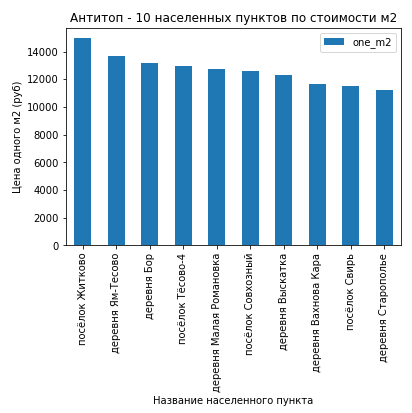

- среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений;

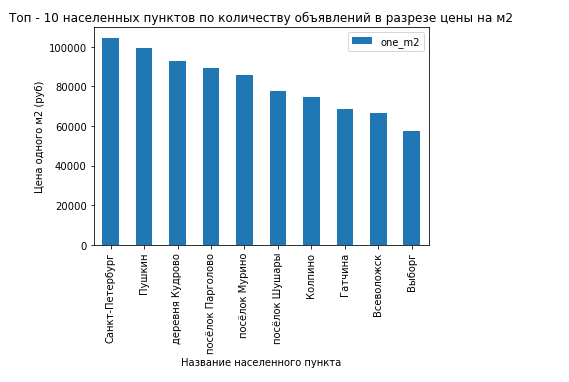

- между расстоянием от центра и  ценой недвижимости прослеживается отрицательная корреляция, чем дальше расстояние от центра, тем дешевле стоят квартиры.
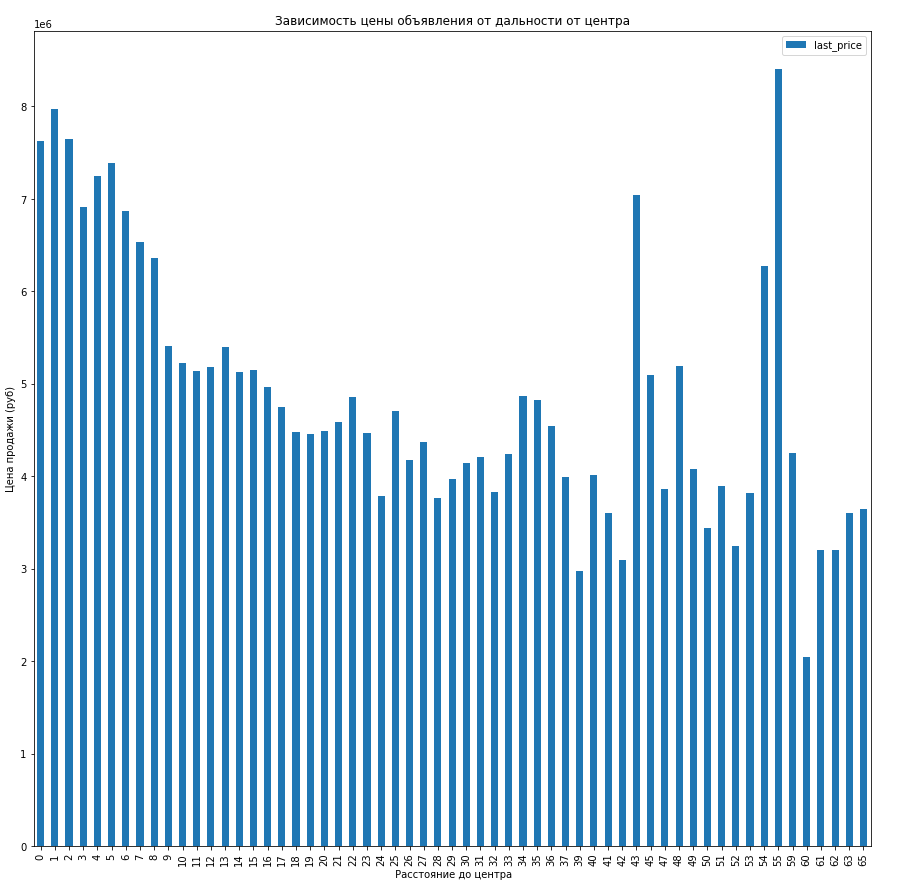